In [135]:
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.svm import SVC
import os
os. environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#TF_CPP_MIN_LOG_LEVEL: 텐서 플로우 로그
#0: 모든 로그 출력(default)
#1: INFO 로그 필터
#2: INFO, WARNING 로그 필터
#3: INFO, WARNING, ERROR 로그 필터

import matplotlib.pyplot as plt
import matplotlib.image as pli
import numpy as np

In [136]:
iris = datasets.load_iris()
# iris data 불러오기
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data[:100, :2], iris.target[:100], test_size = 0.6, random_state = 42)
#test_size: iris.data와 iris.target의 데이터 중 60%를 X_test와 y_test에 분배, 나머지 40%를 X_train과 y_train에 분배
#random_state: iris.data, iris.target의 데이터를 랜덤으로 믹스
# 즉, 데이터를 랜덤하게 섞은 후 test_size = 0.6에 맞춰서 분배

In [137]:
# n = len(y_train)

# for i in range(n):
#     if y_train[i] ==0:
#         y_train[i] = -1

# print(y_train)

In [138]:
iris_x_Data = iris.data
iris_y_Data = iris.target



In [139]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [140]:
svm = Ridge(alpha = 0)

N = len(X_train[:,0])
X_Data = np.zeros(N)

# for i in range(N):
#     X_Data[i] = X_test[i, 0]@ X_test[i, 1]

# print(X_Data)

svm.fit(X_test, y_test) #train 데이터를 이용한 SVM 훈련


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [147]:
w = svm.coef_.T

b = y_train - np.dot(w,X_train[:, 0])

print(f"w = {w}, b = {b}")

ValueError: shapes (2,) and (40,) not aligned: 2 (dim 0) != 40 (dim 0)

In [142]:
# t = 0

# for i in range(len(y_train)):
#         t = t + alpha[i]*y_train[j]

#         print(t)


In [143]:
h = 0.01
x_min, x_max = X_test[:, 0].min()-1 , X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min()-1 , X_test[:, 1].max() + 1
#데이터가 그래프에 가려지지 안도록 그래프의 크기 조절

x_axis = np.linspace(x_min, x_max, 1000)
y_axis = -(w[0] / w[1]) * x_axis -b/w[1]
margin_up = -(w[0] / w[1]) * x_axis  - (b-1)/w[1]
margin_down = -(w[0] / w[1]) * x_axis - (b+1)/w[1]

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = np.c_[xx.ravel(), yy.ravel()]
                     
# Plot decision boundary of Linear SVM
# Z_linear = svm.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_linear = Z_linear.reshape(xx.shape)
# plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.plot(x_axis, y_axis, "k-")
plt.plot(x_axis, margin_up, "k--")
plt.plot(x_axis, margin_down, "k--")

plt.title('Linear SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.grid()
plt.show()

IndexError: invalid index to scalar variable.

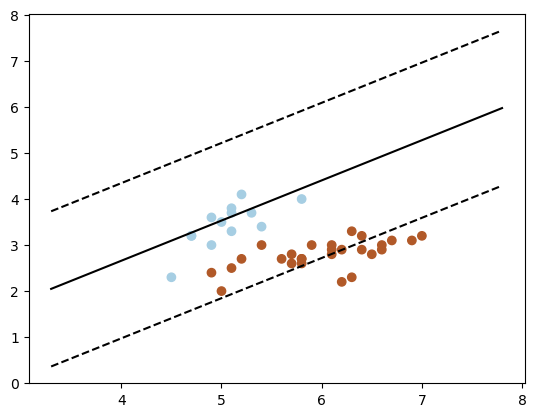

In [ ]:
plt.plot(x_axis, y_axis, "k-")
plt.plot(x_axis, margin_up, "k--")
plt.plot(x_axis, margin_down, "k--")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.show()